<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Zalocusky_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import h5py    
import numpy as np    
import scipy
from matplotlib import pyplot as plt

In [3]:
link = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5'
file_name = 'GSE167497_filtered_gene_bc_matrices_h5.h5'

!wget -O $file_name $link

--2023-06-06 18:40:24--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12286523 (12M)
Saving to: ‘GSE167497_filtered_gene_bc_matrices_h5.h5’

GSE167497_filtered_ 100%[===================>]  11.72M  27.4MB/s    in 0.4s    

2023-06-06 18:40:25 (27.4 MB/s) - ‘GSE167497_filtered_gene_bc_matrices_h5.h5’ saved [12286523/12286523]



In [4]:
f1 = h5py.File("/content/"+file_name,'r+') 

In [5]:
shape = f1['mm10-1.2.0_premrna']['shape']
shape = [shape[1],shape[0]]

In [6]:
sparse_MAT = scipy.sparse.csr_matrix((f1['mm10-1.2.0_premrna']['data'],
                                      f1['mm10-1.2.0_premrna']['indices'],
                                      f1['mm10-1.2.0_premrna']['indptr']), shape=shape)

dense_MAT = sparse_MAT.todense()


In [7]:
print('mat shape',dense_MAT.shape)
print('barcode_len ',len( f1['mm10-1.2.0_premrna']['barcodes']))
print('gene_names ',len( f1['mm10-1.2.0_premrna']['gene_names']))
print('genes ',len( f1['mm10-1.2.0_premrna']['genes']))

mat shape (4969, 27998)
barcode_len  4969
gene_names  27998
genes  27998


In [9]:
x = np.emath.logn(1000, dense_MAT+1)

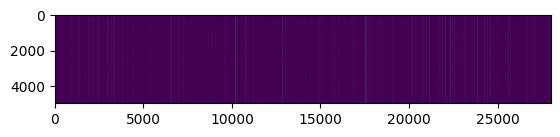

In [10]:
plt.imshow(x)